# Cosmology Introduction

This notebook will step you through some of the simple steps needed to calculate and plot the expansion of the universe as a function of time. 


## 1. How old is the universe?

In order to calculate how the expansion of the universe changes with time one needs to integrate over the changing expansion history.  

We define an overdot to mean differentiation with respect to time: $\dot{a}=da/dt$.  Which means that,
    
\begin{equation} \int_0^t dt = \int_0^a \frac{da}{\dot{a}}. \end{equation}

That is convenient because we know an equation for $\dot{a}$ as a function of $a$, Friedmann's equation!  Let's start with a simple flat matter-dominated universe, for which Friedmann's equation gives,

$$ \dot{a} = H_0 a^{-1/2}. $$

It's easy to show analytically that in this flat matter dominated case the integral above for scalefactor as a function of time becomes, 

$$ t = \frac{2}{3H_0}a^{3/2}. $$

For more complex models there's no simple analytic solution, so we will want to do that numerically.  Let's see how to do it numerically in this simple case first.


In [1]:
# First let's set up our packages
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


In [2]:
# Write a function for the integrand, i.e. $1/\dot{a}$ (adot inverse)
# I'm going to keep the constant H_0 outside the integral and add it later.
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# First note some weird python notation, if you say "x, y = 1, 2" it's the same as saying "x=1" and "y=2".

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
print('')
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))



Age of the universe in Hubble times = 0.667 which is 9.32 Gyr
Does this match the analytic prediction of 2/3 Hubble times?  Yes!

Uncertainty on the numerical integral is  7.401486830834379e-16 so should be negligible.
Just checking that the one-step age calculation (9.32 Gyr) matches the two step one (9.32 Gyr).


### 1.1 For you!
Now you can have a go and change the limits of the integral so you can measure different times.  
For example how old was the universe when it was half its current size?  
How long will it take to expand from now to twice it's current size?

In [3]:
# Insert your code here

age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,0.5)
age_half_Gyr = age_Hubble/H0y
print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_half_Gyr))
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.')

age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,2)
age_double_Gyr = age_Hubble/H0y
print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_double_Gyr))
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.')

# Remember to write print statements to see the answers. 


Age of the universe in Hubble times = 0.236 which is 3.29 Gyr
Uncertainty on the numerical integral is  2.6168207644729585e-16 so should be negligible.
Age of the universe in Hubble times = 1.886 which is 26.35 Gyr
Uncertainty on the numerical integral is  2.093456611578367e-15 so should be negligible.


## 2. Scalefactor vs time

Now let's try to calculate the time not just at one value of scalefactor, but a whole array.  We can then make a plot of scalefactor vs time.

In [4]:
# Start by making an array of scalefactors
astart = 0.0
astop = 20
astep = 0.01 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print('a_arr=',a_arr)

a_arr= [0.000e+00 1.000e-02 2.000e-02 ... 1.997e+01 1.998e+01 1.999e+01]


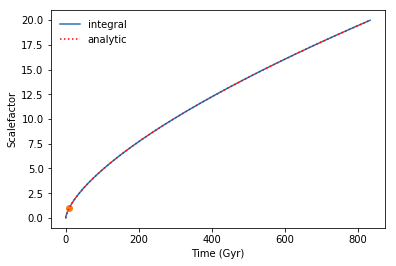

In [5]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y
    
# It's good practise to compare it to the analytic calculation when available    
t_analytic_Gyr = (2/3)*(1/H0y)*(a_arr**(3/2)) 

plt.plot(t_Gyr,a_arr,label='integral')
plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

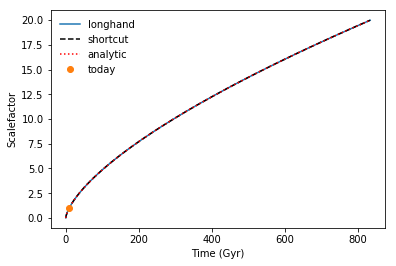

In [6]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

### 2.1 Lookback time - for you
It can be useful to normalise time to be 0 at the present day, then everything in the past is a negative time relative to today.   You can do that by setting the lower limit of the integral to a=1.0, then all times are measured relative to the present time.

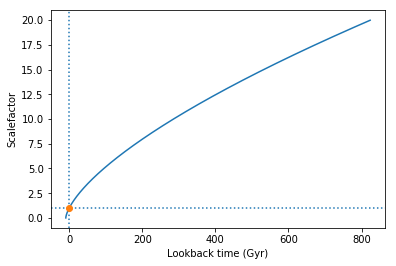

In [7]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_lookback_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,1,a_end)
    t_lookback_Gyr[i] = t_Hubble/H0y

# Uncomment the commands below to plot your result
plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

### 2.2 Another way to calculate lookback time
If you don't want to do the integral again (integrals can be computationally expensive) you can find the time closest to the present day by finding the index closest to a=1.0, and subtracting that time from all the times in the array.  Give that a go...

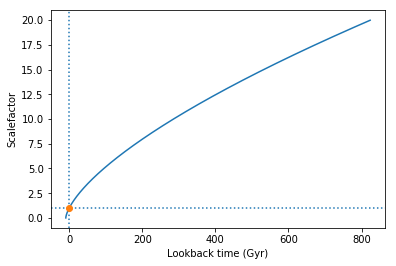

In [8]:
# First calculate the index corresponding to a=1.0.  (Find when |a-1.0| is minimum.  You could also do this by just redoing the integral from 0<a<1, but the way I've set it up above we know we have an a=1 in the array, so we can just find what we've already calculated.)
index_today = np.argmin(np.abs(a_arr - 1.0))

# Then find the time corresponding to that index  (note you do NOT have to do the integral again)
age_today = t_Gyr[index_today] 

t2_lookback_Gyr = t_Gyr-age_today

# Uncomment the commands below to plot your result
plt.plot(t2_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

## 3. More complex models

In general Friedmann's equation gives,

$$ H(a)^2\equiv \frac{\dot{a}^2}{a^2} = H_0^2 \sum_i \Omega_i a^{-3(1+w_i)}, $$

where the $\Omega_i$ correspond to different components of the universe (like matter) and $w_i$ are the corresponding equations of state. 

Writing that out more fully we should consider 
matter density $\Omega_M$ (includes normal and dark matter and $w_M=0$); 
curvature $\Omega_K=1.0-\Omega_M-\Omega_\Lambda$ ($w_K=-1/3$);
and cosmological constant $\Omega_\Lambda$ ($w_\Lambda=-1$).  

Later we'll consider a more general dark energy $\Omega_x$ ($w_x=$ unknown), and also add radiation density $\Omega_R$ ($w_R=1/3$). 

Expanding the sum above for a universe with matter and a cosmological constant we get,
$$ \frac{\dot{a}}{a} = H_0 \left[\Omega_M a^{-3}+\Omega_K a^{-2} + \Omega_\Lambda \right]^{1/2}. $$

Now let's integrate this more complex function.

In [9]:
# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot
def adotinv(a,om,ol):
    ok = 1.0-om-ol
    adot = a*((om*(a**-3)+ol+ok*(a**-2))**(1/2))
    return 1.0/adot

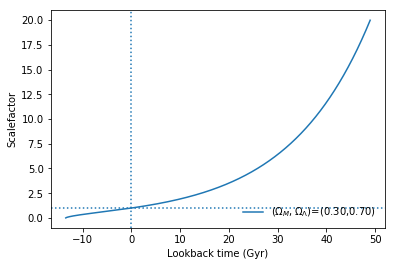

In [10]:
# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.3
ol = 0.7

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))"

for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv,1,a_end,args=(om,ol))
    t_lookback_Gyr[i] = t_Hubble/H0y

# Plot this new model (note I've added a label that can be used in the legend)
plt.plot(t_lookback_Gyr,a_arr,label='$(\Omega_M,\Omega_\Lambda)$=(%.2f,%.2f)'%(om,ol)) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

### 3.1 Your turn!  Build your own universes!
Change the input matter density and cosmological constant.
 - Can you make a universe that recollapses?
 - What about one that has a bounce instead of a Big Bang in the past?
 - What about one that always decelerates but never recollapses?
 - Can you find any really weird behaviour?  If so can you explain it?

### 3.2 Plot many universes on the same plot
Now you can take that all and put it in a loop if you like, to compare different universes:


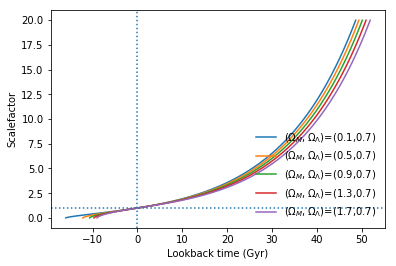

In [11]:
om_arr = np.arange(0.1,2.1,0.4)
ol = 0.7

for om in om_arr:
    
    for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
        t_Hubble,uncert = integrate.quad(adotinv,1,a_end,args=(om,ol))
        t_lookback_Gyr[i] = t_Hubble/H0y
        
    plt.plot(t_lookback_Gyr,a_arr,label='$(\Omega_M,\Omega_\Lambda)$=(%.1f,%.1f)'%(om,ol))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

### 3.3 Your turn!  Add even more complex models...
Congratulations, you can now calculate how the expansion of the universe proceeds with time! 

From here you can play with the input parameters.  What happens when you:
 - fix the cosmological constant and change matter density?
 - add radiation?
 - add dark energy with a different equation of state?

You might find it useful to make a more general `adotinv` function that takes into account all these possibilities.

#### The following is a completely generalised model that can be customised to whatever cosmology is needed

In [12]:
# Generalised Model
def adotinv(a, om, wm, ol, w0, wa, orr, wr, wk):
    ok = 1.0-om-ol-orr
    adot = a*((om*(a**(-3*(1+wm)))+ol*(a**(-3*(1+w0+wa)))*np.exp(-3*wa*(1-a))+orr*(a**(-3*(1+wr)))+ok*(a**(-3*(1+wk))))**(1.0/2.0))
    return 1.0/adot

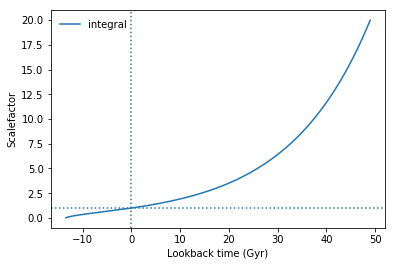

In [13]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Choose a cosmology
om, wm, ol, w0, wa, orr, wr, wk = 0.3, 0.0, 0.7, -1.0, 0.0, 0, 1.0/3.0, -1.0/3.0

# Make a loop and do that integral for every final value of a (starting at a=1 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv,1,a_end,args=(om, wm, ol, w0, wa, orr, wr, wk))
    t_Gyr[i] = t_Hubble/H0y
    
plt.plot(t_Gyr,a_arr,label='integral')
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

#### List One Plots

In [14]:
# Generalised Model
def adotinv(a, om, wm, ol, w0, wa, orr, wr, wk):
    ok = 1.0-om-ol-orr
    adot = a*((om*(a**(-3*(1+wm)))+ol*(a**(-3*(1+w0+wa)))*np.exp(-3*wa*(1-a))+orr*(a**(-3*(1+wr)))+ok*(a**(-3*(1+wk))))**(1.0/2.0))
    return 1.0/adot

def HubbleParameter(a,om,wm,ol,w0,wa,orr,wr,wk):
    ok = 1.0-om-ol-orr
    adot = (om*(a**(-3*(1+wm)))+ol*(a**(-3*(1+w0+wa)))*np.exp(-3*wa*(1-a))+orr*(a**(-3*(1+wr)))+ok*(a**(-3*(1+wk))))**(1/2)
    return adot

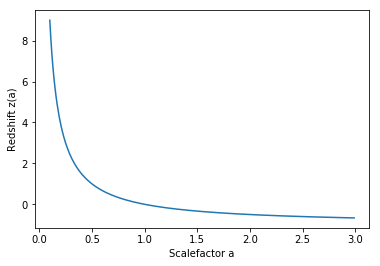

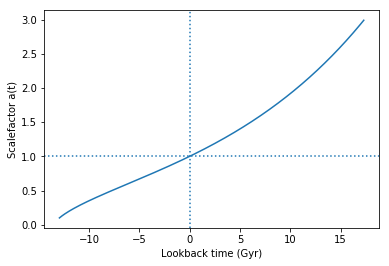

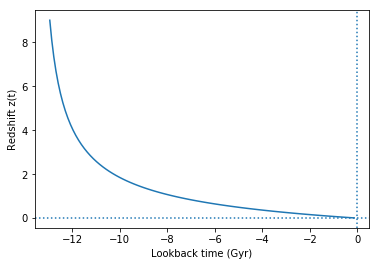

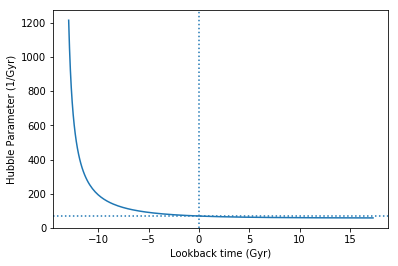

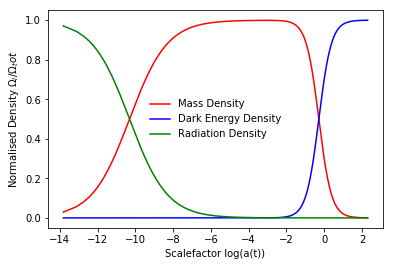

In [19]:
# REDSHIFT AS A FUNCTION OF SCALEFACTOR
# Start by making an array of scalefactors
astart = 0.1
astop = 3
astep = 0.01 
a_arr2 = np.arange(astart,astop,astep)

astart = 0.1
astop = 1
astep = 0.01 
a_arr3 = np.arange(astart,astop,astep)

z = (1/(a_arr2))-1.0

# Plot
plt.plot(a_arr2,z)
plt.xlabel('Scalefactor a')
plt.ylabel('Redshift z(a)')
plt.show()

# SCALE FACTOR, REDSHIFT AND HUBBLE PARAMETER AS A FUNCTION OF TIME
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr2 = np.zeros(len(a_arr2))
t_Gyr3 = np.zeros(len(a_arr3)) 

# Choose a cosmology
om, wm, ol, w0, wa, orr, wr, wk = 0.3, 0.0, 0.7, -1.0, 0.0, 10**-5, 1.0/3.0, -1.0/3.0

# Make a loop and do that integral for every final value of a (starting at a=1 every time)
for i,a_end in enumerate(a_arr2): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv,1,a_end,args=(om, wm, ol, w0, wa, orr, wr, wk))
    t_Gyr2[i] = t_Hubble/H0y
    
for i,a_end in enumerate(a_arr3): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv,1,a_end,args=(om, wm, ol, w0, wa, orr, wr, wk))
    t_Gyr3[i] = t_Hubble/H0y    

H = H0kmsmpc*HubbleParameter(a_arr2,om, wm, ol, w0, wa, orr, wr, wk)    

plt.plot(t_Gyr2,a_arr2)
plt.axvline(x=0,linestyle=':') 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor a(t)')
plt.show()

plt.plot(t_Gyr3,(1/a_arr3)-1)
plt.axvline(x=0,linestyle=':') 
plt.axhline(y=0,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Redshift z(t)')
plt.show()

plt.plot(t_Gyr2,H)
plt.axvline(x=0,linestyle=':')
plt.axhline(y=70,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Hubble Parameter (1/Gyr)')
plt.show()

# NORMALISED DENSITIES VS TIME AND AGE OF UNIVERSE VS DENSITIES
astart = 0.000001
astop = 10
astep = 0.000001 
a_arr4 = np.arange(astart,astop,astep)

Omt = om*(a_arr4**(-3*(1+wm)))
Olt = ol*(a_arr4**(-3*(1+w0)))
Ort = orr*(a_arr4**(-3*(1+wr)))
Oitot = Omt+Olt+Ort

plt.plot(np.log(a_arr4),Omt/Oitot,color='red',label='Mass Density')
plt.plot(np.log(a_arr4),Olt/Oitot,color='blue',label='Dark Energy Density')
plt.plot(np.log(a_arr4),Ort/Oitot,color='green',label='Radiation Density')
plt.xlabel('Scalefactor log(a(t))')
plt.ylabel('Normalised Density $\Omega_i$/$\Omega_tot$')
plt.legend(frameon=False)
plt.show()


#### Age of the Universe vs Density Parameters

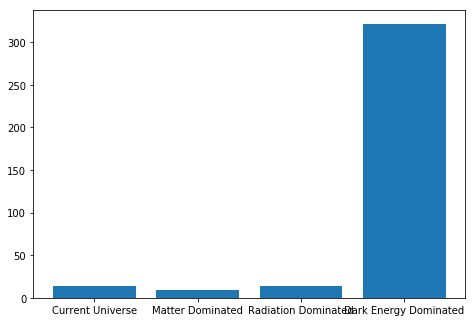

In [16]:
# Current Universe
om, wm, ol, w0, wa, orr, wr, wk = 0.3, 0.0, 0.7, -1.0, 0.0, 0, 1.0/3.0, -1.0/3.0

t_HubbleCurrent,uncertCurrent = integrate.quad(adotinv,10**-10,1,args=(om, wm, ol, w0, wa, orr, wr, wk))
t_GyrCurrent = t_HubbleCurrent/H0y

# Matter dominated
om, wm, ol, w0, wa, orr, wr, wk = 1.0, 0.0, 0.0, -1.0, 0.0, 0, 1.0/3.0, -1.0/3.0

t_HubbleMatter,uncertMatter = integrate.quad(adotinv,10**-10,1,args=(om, wm, ol, w0, wa, orr, wr, wk))
t_GyrMatter = t_HubbleMatter/H0y

# Radiation dominated
om, wm, ol, w0, wa, orr, wr, wk = 0.0, 0.0, 0.0, -1.0, 1.0, 0, 1.0/3.0, -1.0/3.0

t_HubbleRadiation,uncertRadiation = integrate.quad(adotinv,10**-10,1,args=(om, wm, ol, w0, wa, orr, wr, wk))
t_GyrRadiation = t_HubbleRadiation/H0y

# Cosmological Constant/Dark Matter dominated
om, wm, ol, w0, wa, orr, wr, wk = 0.0, 0.0, 1.0, -1.0, 0.0, 0, 1.0/3.0, -1.0/3.0

t_HubbleCosmological,uncertCosmological = integrate.quad(adotinv,10**-10,1,args=(om, wm, ol, w0, wa, orr, wr, wk))
t_GyrCosmological = t_HubbleCosmological/H0y

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Dominant = ['Current Universe', 'Matter Dominated', 'Radiation Dominated', 'Dark Energy Dominated']
Age = [t_GyrCurrent, t_GyrMatter, t_GyrRadiation, t_GyrCosmological]
ax.bar(Dominant,Age)
plt.show()